# Impact of Covid-19 on tourism: Predictive model

The tourism industry has been masively affected by the Covid-19 situation. One of the indicators for travelling is the number of Airbnb reviews, treated here as demand. 

This notebook builds a predictive model to compare the actual Airbnb demand with the forecasted Airbnb demand if Covid-19 did not occur.

**Input:**
Bristol_reviews.csv 
This dataset is the reviews file downloaded from http://insideairbnb.com/get-the-data.html. It contains all the reviews up to the last scraped date.

**Output:**
Bristol_forecast_components.csv
Bristol_reviews_prediction.csv
The first output represents the forecast components, namely the overall trend and the yearly trend. The second output contains the actual preporcessed data, the training data and the forecast data.

**Steps**
1. Preprocess the data and aggregate it by month.
2. Build a predictive model using FB Prophet and plot the data
3. Export the data to create a dashboard



In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

!pip install html5lib
!pip install wget

import requests
from bs4 import BeautifulSoup
import pandas as pd
import io
import html5lib
from tqdm import tqdm
import gzip, requests, zipfile, io
from datetime import datetime
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import wget
import gzip
import shutil
import glob
!pip install fbprophet
import fbprophet

## Preprocess the data 

In [3]:
city_reviews = pd.read_csv("Bristol_reviews.csv")

In [4]:
city_reviews.date = pd.to_datetime(city_reviews.date, format="%Y-%m-%d")
city_reviews.date = city_reviews.date.apply(lambda x: x.strftime('%Y-%m'))

In [5]:
def calculate_no_reviews(city_reviews):
    
    city_reviews['review_count'] = 0
    city_demand = city_reviews.groupby(['date']).agg({'review_count':'count'}).reset_index()
    
    return city_demand

In [6]:
city_demand = calculate_no_reviews(city_reviews)

In [7]:
print(city_demand.head())

      date  review_count
0  2011-07             2
1  2011-08             3
2  2011-09             2
3  2011-10             2
4  2011-11             3


## Predict number of reviews using FB Prophet

In [8]:
city_demand.rename(columns={'date': 'ds', 'review_count': 'y'}, inplace=True)
city_demand_train = city_demand[:-5]
city_demand_train.tail()

,ds,y
94,2019-08,3576
95,2019-09,3591
96,2019-10,3350
97,2019-11,3243
98,2019-12,2786


In [9]:
model = fbprophet.Prophet(
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    changepoint_prior_scale=0.05,
    interval_width=0.95,
    mcmc_samples=300)

model.add_seasonality(name='yearly', period=365.25, fourier_order=5)
model.fit(city_demand_train)

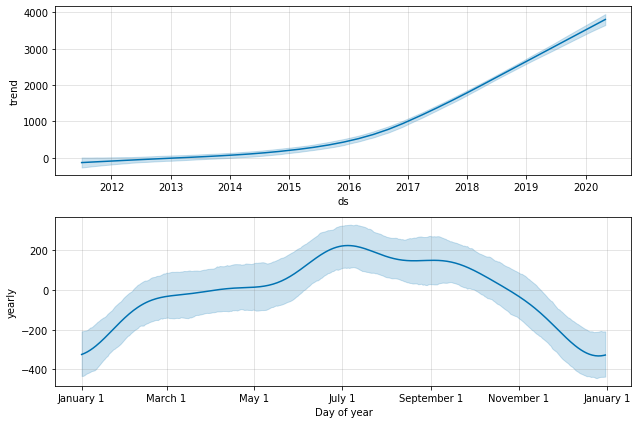

In [10]:
forecast = model.predict(city_demand)
forecast[['ds', 'yhat']].head()
model.plot_components(forecast)
plt.savefig('trends.png', fontsize=14)

In [13]:
city_demand.ds = pd.to_datetime(city_demand.ds, format="%Y-%m")
city_demand.ds = city_demand.ds.apply(lambda x: x.strftime('%Y-%m-%d'))
city_demand.ds = pd.to_datetime(city_demand.ds, format="%Y-%m-%d").dt.date
city_demand_train.ds = pd.to_datetime(city_demand_train.ds, format="%Y-%m")
city_demand_train.ds = city_demand_train.ds.apply(lambda x: x.strftime('%Y-%m-%d'))
city_demand_train.ds = pd.to_datetime(city_demand_train.ds, format="%Y-%m-%d").dt.date

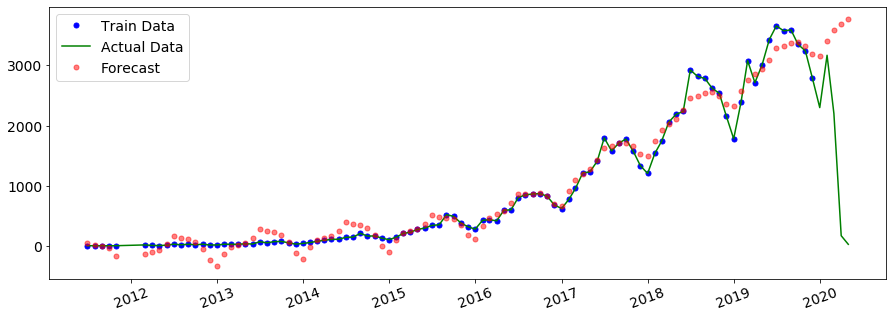

In [17]:
plt.close()
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(city_demand_train['ds'],city_demand_train['y'], c='blue', marker='o',ms=5, linestyle='None', label = 'Train Data')
ax.plot(city_demand['ds'],city_demand['y'], c='g', label = 'Actual Data')

ax.plot(forecast['ds'],forecast['yhat'], c='r', marker='o', ms=5, linestyle='None', label='Forecast', alpha=0.5)
plt.xticks(rotation=20,fontsize=14)
plt.yticks(fontsize=14)
ax.legend(fontsize=14)

plt.show()
plt.close()

## Export the data

In [18]:
city_data = pd.DataFrame(city_demand['ds'])

In [19]:
city_data['Actual_Data'] = city_demand['y']
city_data['Forecast'] = forecast['yhat']
city_data['Train_Data'] = city_demand_train['y']
city_data['city'] = 'Bristol'
city_data['country'] = 'United Kingdom'
city_data.ds = pd.to_datetime(city_data.ds, format="%Y-%m-%d")
city_data.ds = city_data.ds.apply(lambda x: x.strftime('%Y-%m'))
city_data.long =  -2.587910

In [15]:
city_data.to_csv('Bristol_reviews_prediction.csv')

In [14]:
forecast['city'] = 'Bristol'
forecast['country'] = 'United Kingdom'
forecast.ds = pd.to_datetime(forecast.ds, format="%Y-%m-%d")
forecast.ds = forecast.ds.apply(lambda x: x.strftime('%Y-%m'))

In [17]:
forecast.to_csv('Bristol_forecast_components.csv')

**Authors:**
<br>Maria Ivanciu is AI Developer in R<sup>2</sup> Data Labs, Rolls-Royce.</br>
<br>Vincent Nelis is Senior Data Scientist with IBM Data Science & AI Elite team.</br>